In [72]:
%matplotlib inline
import quandl
import seaborn as sns
import pandas as pd
token='QWe8iSbyAFzRuod2aroM'

In [73]:
import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

In [ ]:
mkts={'SP 500':'CHRIS/CME_SP1',
      'US 10Y':'CHRIS/CME_TY1',
      'Crude Oil':'CHRIS/CME_CL1',
      'Eurostoxx 50':'CHRIS/EUREX_FESX1'
      }

In [ ]:
data_index=pd.DataFrame()
for m in mkts.keys():
    try:
        data_index[m]=quandl.get(mkts[m],token=token).Last
    except:
        data_index[m]=quandl.get(mkts[m],token=token).Settle
data_pct=data_index.pct_change()     

In [ ]:
data_pct['2018':].cumsum().ffill().plot(colormap='brg')

In [67]:

fil='https://cib.societegenerale.com/fileadmin/indices_feeds/CTAM_Historical.xls'
x=pd.read_csv(fil,sep='\t',index_col=0,parse_dates=[0],usecols=[0,1])
x.ix[:,0].plot()

In [77]:
web_root='https://cib.societegenerale.com/fileadmin/indices_feeds/'
indices={'CTA':'CTA_Historical.xls',
         'CTA Mutual Funds':'CTAM_Historical.xls',
         'Trend Index':'Trend_Index_Historical.xls',
         'Short Term Traders Index':'STTI_Historical.xls',
         'Multi Alternative Risk Premia':'MARP_Historical.xls'
        }
data_index=pd.DataFrame()
for i in indices.keys():
    file='https://cib.societegenerale.com/fileadmin/indices_feeds/'+indices[i]
    data_index[i]=pd.read_csv(file,sep='\t',index_col=0,parse_dates=[0],usecols=[0,1]).ix[:,0]


/Users/mrefermat/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  # This is added back by InteractiveShellApp.init_path()


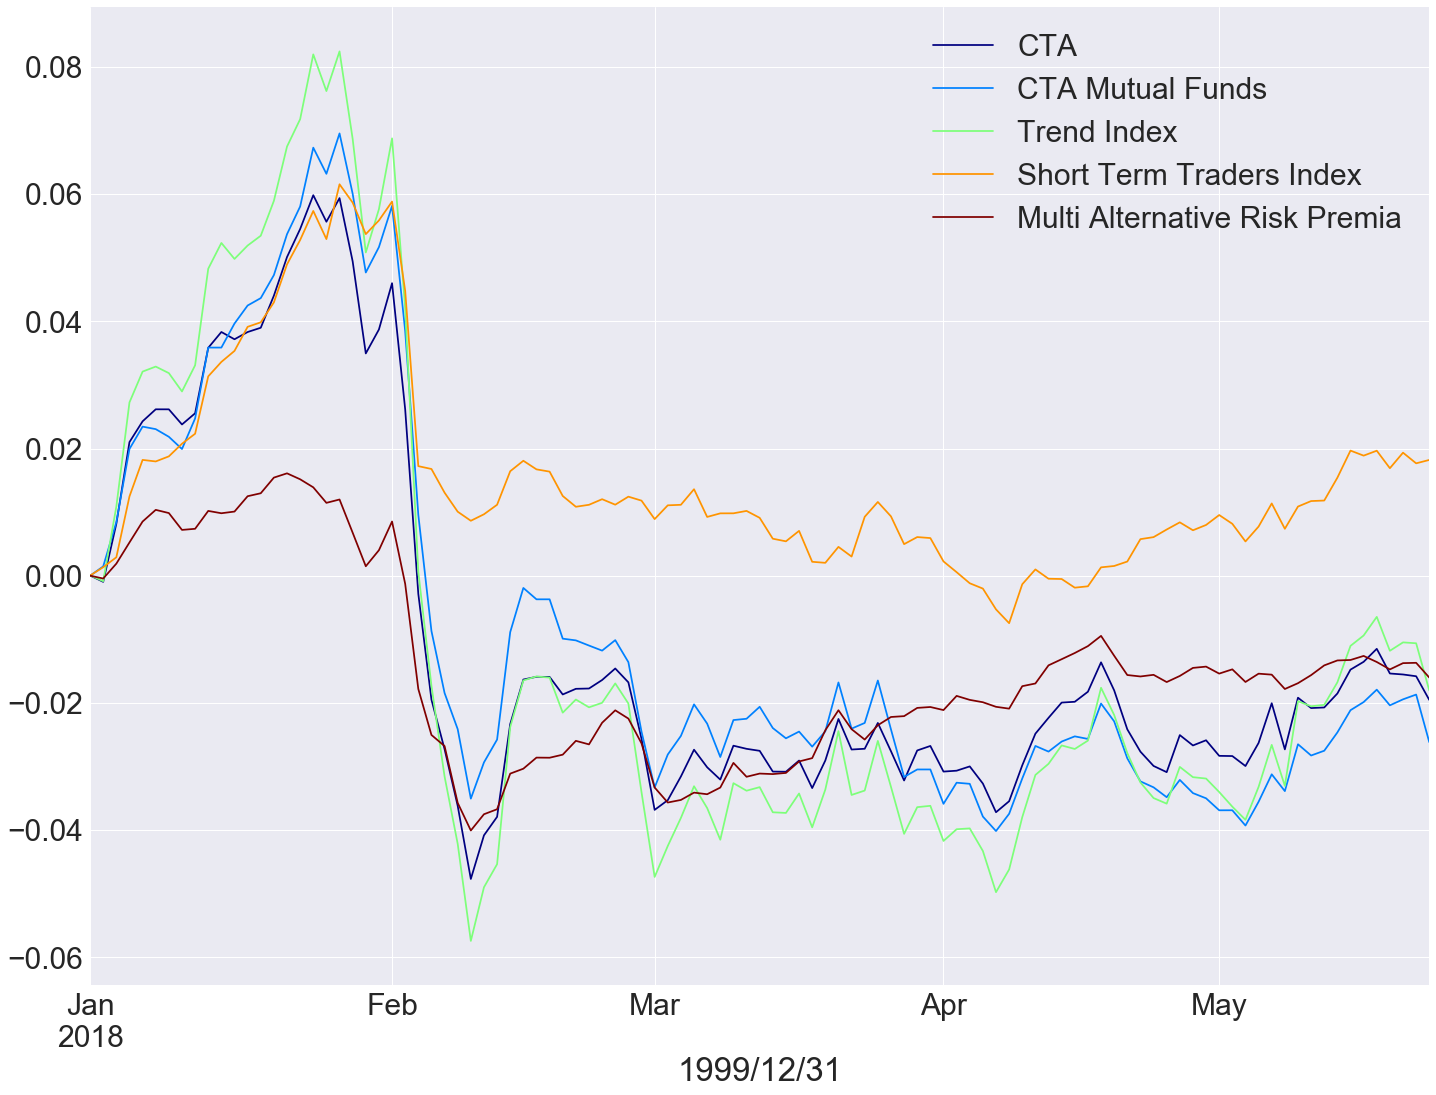

In [83]:
data_index.pct_change()['2018':].cumsum().ffill().plot(colormap='jet')